In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset.drop(columns=["CustomerID"], axis=1, inplace=True)
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [4]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
dataset.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Gender"]=le.fit_transform(dataset["Gender"])

In [7]:
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for item in dataset:
    print(item)
    dataset[item]=sc.fit_transform(dataset[[item]])

Gender
Age
Annual Income (k$)
Spending Score (1-100)


In [9]:
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

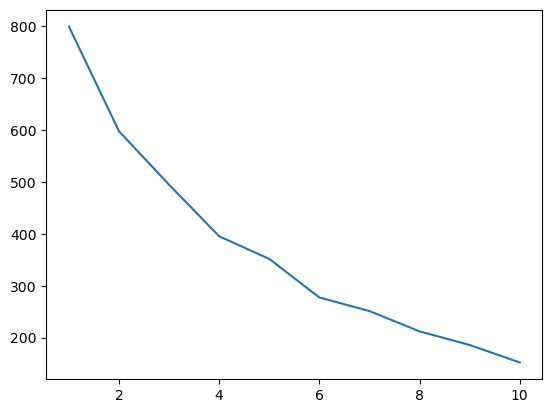

In [12]:
plt.plot(range(1, 11), wcss)
plt.show()
#so, we notice from the plot that k=6

In [13]:
k=6
kmeans=KMeans(n_clusters=k, init="k-means++", random_state=42)
kmeans.fit(dataset)

KMeans(n_clusters=6, random_state=42)

In [14]:
y_pred=kmeans.predict(dataset)

In [15]:
y_pred

array([2, 2, 4, 4, 4, 4, 5, 4, 0, 4, 0, 4, 5, 4, 0, 2, 4, 2, 0, 4, 0, 2,
       5, 2, 5, 2, 5, 2, 5, 4, 0, 4, 0, 2, 5, 4, 5, 4, 5, 4, 5, 2, 0, 4,
       5, 4, 5, 4, 4, 4, 5, 2, 4, 0, 5, 0, 5, 0, 4, 0, 0, 2, 5, 5, 0, 2,
       5, 5, 2, 4, 0, 5, 5, 5, 0, 2, 5, 2, 4, 5, 0, 2, 0, 5, 4, 0, 5, 4,
       4, 5, 5, 2, 0, 5, 4, 2, 5, 4, 0, 2, 4, 5, 0, 2, 0, 4, 5, 0, 0, 0,
       0, 4, 5, 2, 4, 4, 5, 5, 5, 5, 2, 5, 3, 2, 4, 3, 1, 2, 0, 2, 1, 2,
       4, 3, 1, 3, 5, 2, 1, 3, 5, 2, 3, 3, 1, 2, 1, 3, 5, 2, 1, 2, 5, 3,
       5, 3, 1, 3, 1, 3, 5, 3, 1, 3, 1, 3, 1, 3, 5, 2, 1, 2, 1, 2, 5, 3,
       1, 2, 1, 2, 3, 3, 1, 3, 3, 2, 5, 2, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3,
       1, 3], dtype=int32)

<Axes: >

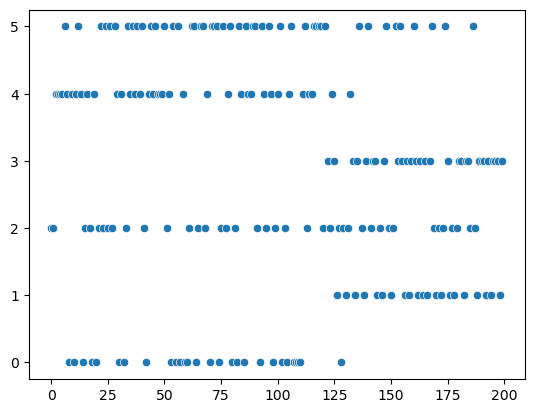

In [16]:
#it is not a good idea to show a plot of data. because 
# we have more than two parameters in the model and it 
# is not possible to show in 2 dimentions.
sns.scatterplot(x=range(0, 200), y=y_pred)

### second model:

In [17]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.5, min_samples=3)
db.fit(dataset)

DBSCAN(min_samples=3)

In [18]:
y_pred=db.labels_

In [19]:
y_pred

array([-1,  1, -1,  0,  2,  0, -1, -1, -1,  0, -1, -1,  3,  0, -1,  1,  2,
        1, -1, -1, -1,  1, -1,  1,  3,  1,  2, -1,  2,  0, -1,  0, -1, -1,
        3,  0, -1, -1,  2,  0, -1, -1,  6,  5, -1,  0,  4,  5,  5,  5,  4,
       -1,  5,  6,  4,  6,  4,  6,  5,  6,  6,  7,  8,  4,  6,  7,  4,  8,
        7,  5,  6,  4,  4,  4,  6,  9,  4, -1,  5,  4,  6, -1,  6,  4,  5,
        6,  4,  5, -1,  4,  8,  9,  6,  5,  5,  9,  4,  5,  6,  9,  5,  4,
        6,  9,  6,  5,  8,  6,  6,  6,  6,  5,  5,  9,  5,  5,  8,  4,  4,
        4,  9,  5, -1, 10,  5, 11, -1, 10, -1, 12, -1, 12,  5, 11, 13, 11,
       15, 12, 13, 11, -1, 10,  5, 11, 13, 10, -1, 11, 16, 10, 14, 10, 15,
       11, 15, 11, 14, 11, 14, 11, -1, 11, 13, 11, -1, 11, 14, 11, 16, 17,
       14, 17, 14, 10, -1, 11, -1, 17, -1, 10, 16, 11, -1, 11, 16, -1, -1,
       -1, -1, 11, 16, -1, -1, 11, -1, -1, -1, -1, -1, -1])

<Axes: >

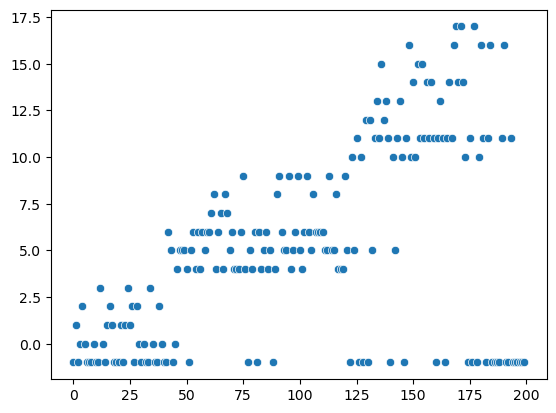

In [20]:
sns.scatterplot(x=range(0, 200), y=y_pred)